In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import hdbscan

In [191]:
CP = np.load('/dls/science/groups/imaging/ePSIC_students/Andy_Bridger/PaperDataRepo/SimulatedData/LatentEncodings/refine_enc_positions4.npy')

In [192]:
epsilon = 0.01

In [193]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=25, metric='euclidean',
cluster_selection_epsilon=epsilon, cluster_selection_method = 'eom', prediction_data=True)

In [194]:
c = clusterer.fit_predict(CP)

soft_clusters = hdbscan.all_points_membership_vectors(clusterer)

In [195]:
c.max()

13

<IPython.core.display.Javascript object>


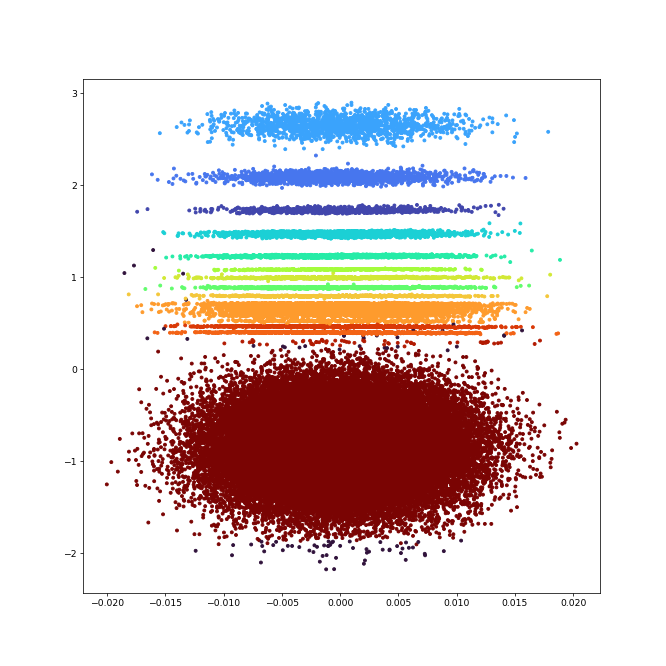

In [196]:
plt.figure(figsize=(10,10))
plt.scatter(CP[:,0], CP[:,1], c =c, s =10, cmap='turbo')
#plt.xlim([-0.5,0.5])
#plt.ylim([-0.5,0.5])

In [197]:
m = c.reshape((295,296))

<IPython.core.display.Javascript object>


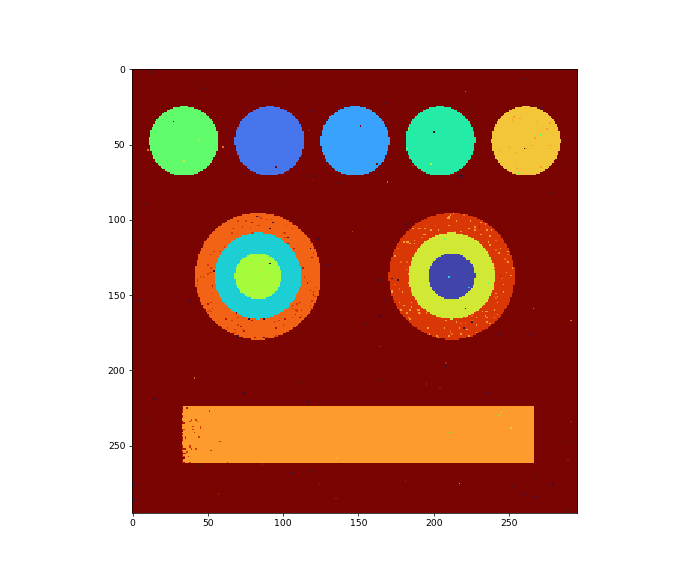

In [198]:
plt.figure()
plt.imshow(m,cmap = 'turbo', interpolation='nearest')

In [199]:
NP = CP[np.where(c==-1)]
OP = CP[np.where(c!=-1)]
oc = c[np.where(c!=-1)]

In [200]:
NP.shape

(87, 2)

In [201]:
nc = [oc[np.argmin(np.linalg.norm(OP-NP[i], axis = 1))] for i in range(len(NP))]

In [202]:
ac = c.copy()
ac[np.where(c ==-1)] = nc

<IPython.core.display.Javascript object>


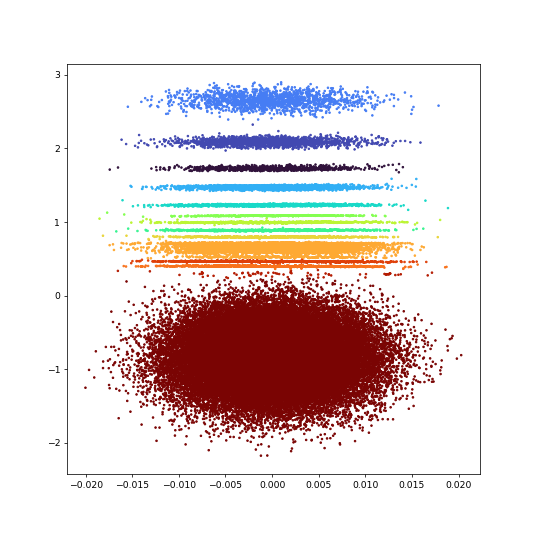

In [203]:
plt.figure(figsize=(8,8))
plt.scatter(CP[:,0], CP[:,1], c =ac, s =3, cmap = 'turbo')

ac = np.load('/dls/science/groups/imaging/ePSIC_students/Al_alloy_4DSTEM_EM19064-2/refine_enc_positions_6-map3.npy')

<IPython.core.display.Javascript object>


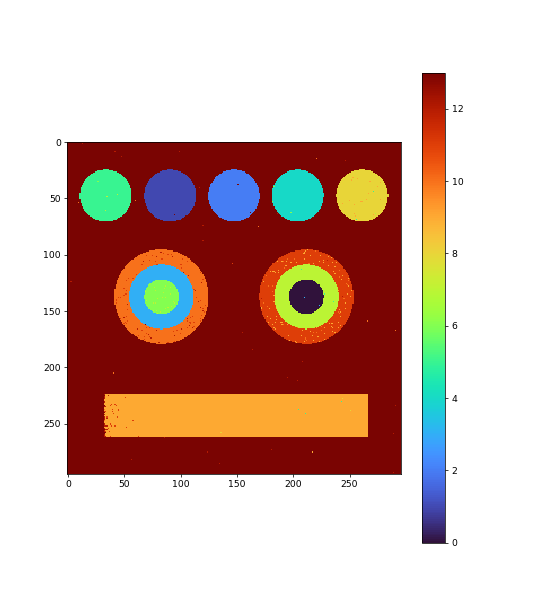

In [204]:
plt.figure()
plt.imshow(ac.reshape((295,296)), interpolation = 'nearest', cmap = 'turbo')
plt.colorbar()

In [212]:
np.save('/dls/science/groups/imaging/ePSIC_students/Andy_Bridger/PaperDataRepo/SimulatedData/FitMap1.npy', acr)

In [205]:
gt = np.load('/dls/science/groups/imaging/ePSIC_students/Andy_Bridger/PaperDataRepo/SimulatedData/SimulatedDS-gtmap.npy')

In [207]:
gt.shape

(295, 296)

In [208]:
acr = ac.reshape((295,296))
accuracy_map = np.zeros_like(gt)
for uind in np.unique(gt):
    wgt = np.where(gt == uind)
    gt_mask = np.where(gt == uind, 1, 0)
    oclass = int(np.round(np.mean(acr[wgt]),0))
    accuracy_map[wgt] = np.sum(np.where(acr == oclass, 1, 0)* gt_mask)/ np.sum(gt_mask)
    

<IPython.core.display.Javascript object>


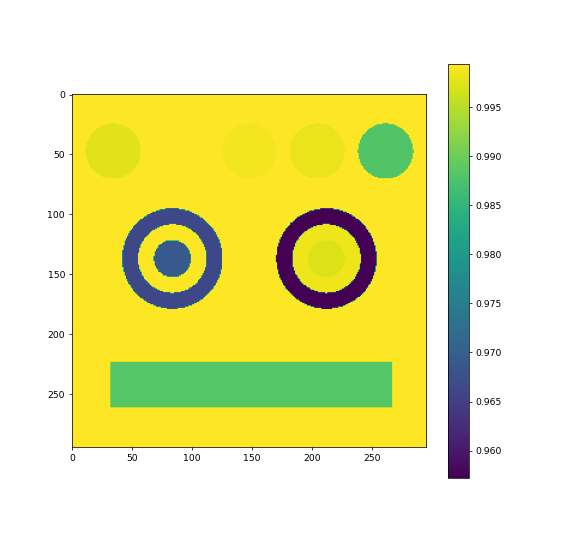

In [210]:
plt.figure()
plt.imshow(accuracy_map)
plt.colorbar()

In [536]:
comb = [0,1,10,12]

In [537]:
temp_map = ac.copy()
for each in comb[1:]:
    temp_map += np.where(temp_map == each, comb[0]-each, 0)
new_map = np.zeros_like(temp_map)
for i, u in enumerate(np.unique(temp_map)):
    new_map += np.where(temp_map == u, i, 0)
    
    

<IPython.core.display.Javascript object>


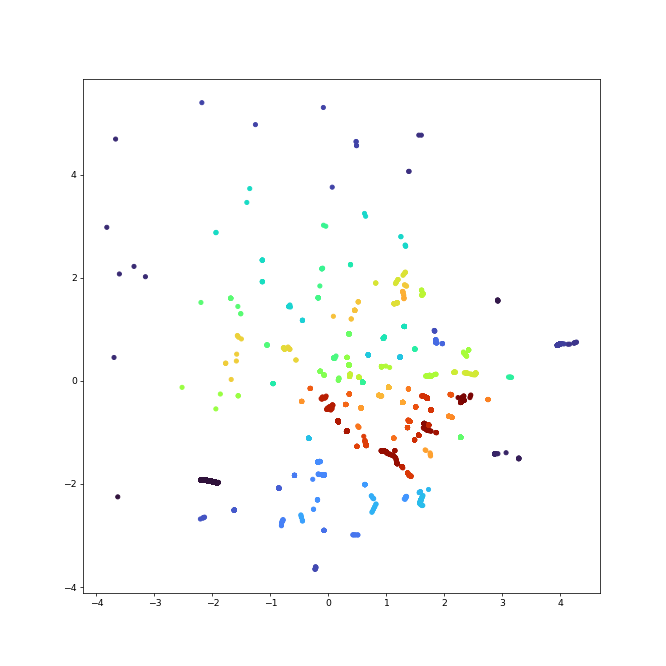

In [541]:
plt.figure(figsize=(10,10))
plt.scatter(CP[:,0], CP[:,1], c =new_map, s =20, cmap='turbo')

<IPython.core.display.Javascript object>


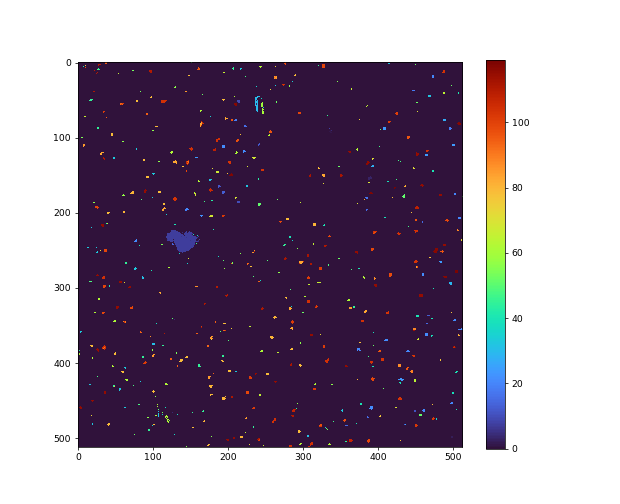

In [538]:
plt.figure()
plt.imshow(new_map.reshape((512,512)), interpolation = 'nearest', cmap = 'turbo')
plt.colorbar()

In [608]:
np.save('/dls/science/groups/imaging/ePSIC_students/Al_alloy_4DSTEM_EM19064-2/precip_map_19.npy', ac.reshape((512,512)))

In [132]:
precip_classes = [0,4]

RP = np.load('/dls/science/groups/imaging/ePSIC_students/Al_alloy_4DSTEM_EM19064-2/refine_enc_positions_12-1.npy')

In [133]:
PF = np.zeros(CP.shape[0])

In [134]:
precip = np.concatenate([np.where(ac==x)[0] for x in precip_classes])

In [135]:
PP = CP[precip]

<IPython.core.display.Javascript object>


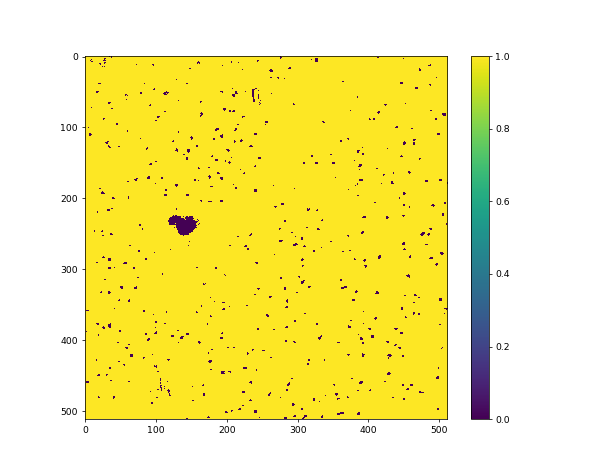

In [136]:
blank = np.zeros_like(PF)
blank[precip] +=1
plt.figure()
plt.imshow(blank.reshape((512,512)), interpolation = 'nearest')
plt.colorbar()

In [322]:
np.save('/dls/science/groups/imaging/ePSIC_students/Al_alloy_4DSTEM_EM19064-2/400kx-precipitate-mask.npy', blank.reshape((512,512)))

In [310]:
epsilon = 0.01

pclusterer = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean',
cluster_selection_epsilon=epsilon, cluster_selection_method = 'eom', prediction_data=True)

pc = pclusterer.fit_predict(PP)

In [254]:
pc.max()

16

<IPython.core.display.Javascript object>


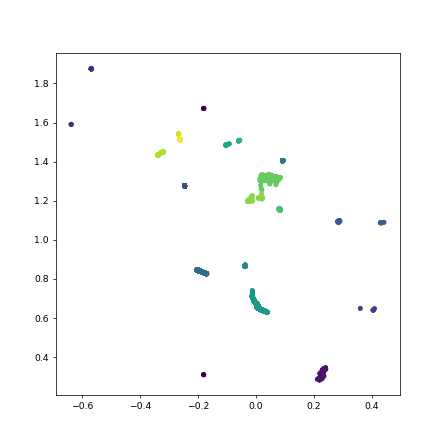

In [258]:
plt.figure(figsize=(10,10))
plt.scatter(PP[:,0], PP[:,1], c =pc, s =20)
#plt.xlim([-0.5,0.5])
#plt.ylim([-0.5,0.5])

In [284]:
PF[precip] = pc

<IPython.core.display.Javascript object>


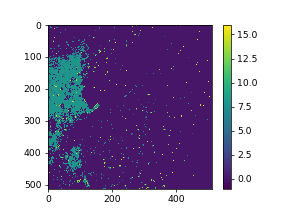

In [285]:
plt.figure()
plt.imshow(PF.reshape((512,512)), interpolation = 'nearest')
plt.colorbar()

In [286]:
where_p = list(np.unique(pc))
where_p.pop(where_p.index(8))

8

In [287]:
where_p

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16]

In [288]:
nPF = np.zeros(PF.shape[0])

nprecip = np.concatenate([np.where(pc==x)[0] for x in where_p])

nPP = RP[precip[nprecip]]

<IPython.core.display.Javascript object>


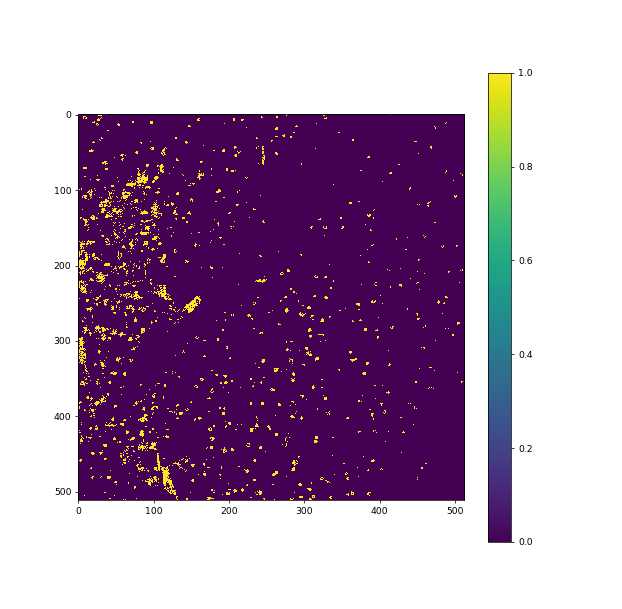

In [289]:
nPF = np.zeros(PF.shape[0])
nPF[precip[nprecip]] += 1
plt.figure()
plt.imshow(nPF.reshape((512,512)), interpolation = 'nearest')
plt.colorbar()

In [290]:
epsilon = 0.1

npclusterer = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean',
cluster_selection_epsilon=epsilon, cluster_selection_method = 'eom', prediction_data=True)

npc = npclusterer.fit_predict(nPP)

npc.max()

9

<IPython.core.display.Javascript object>


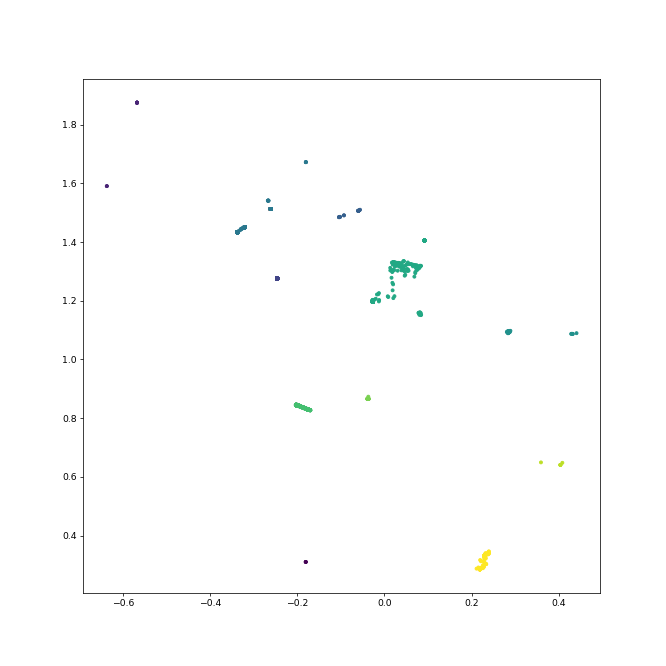

<IPython.core.display.Javascript object>


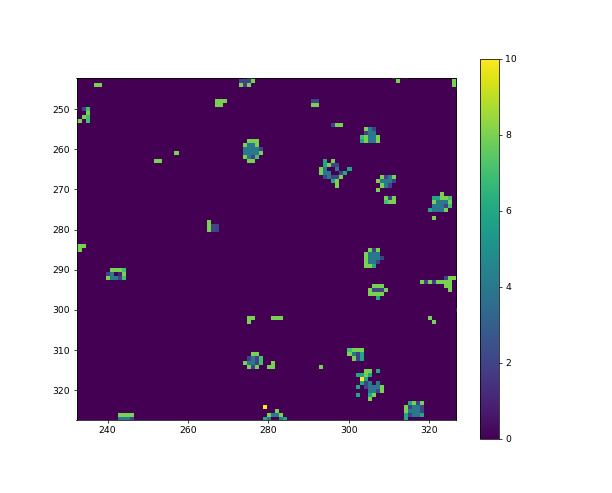

In [291]:
plt.figure(figsize=(10,10))
plt.scatter(nPP[:,0], nPP[:,1], c =npc, s =10)
#plt.xlim([-0.5,0.5])
#plt.ylim([-0.5,0.5])

nPF[precip[nprecip]] = npc+1

plt.figure()
plt.imshow(nPF.reshape((512,512)), interpolation = 'nearest')
plt.colorbar()

In [105]:
np.save('/dls/science/groups/imaging/ePSIC_students/Al_alloy_4DSTEM_EM19064-2/precipitate1-map1.npy', PF.reshape((512,512)))

In [ ]:
PF = 